# Run the data cleaning and functions notebook

In [66]:
%run 02_User_Defined_Functions.ipynb

# Initial Data Exploration

In [67]:
df_cleaned.head()

,NCES_SCH_ID,CHARTER,MAGNET,VIRTUAL,SCHOOL_LEVEL,STITLEI,SCHOOL_TYPE,TOT_FREE_LUNCH,KG,G01,...,SCH_RET_G12_TR_F,TOT_RET_G12_M,TOT_RET_G12_F,SCH_RET_G12_LEP_M,SCH_RET_G12_LEP_F,SCH_RET_G12_IDEA_M,SCH_RET_G12_IDEA_F,SCH_RET_G12_504_M,SCH_RET_G12_504_F,LOCAL_CATEGORY
0,10000500870,No,No,Not Virtual,Middle,1-Yes,Regular school,332.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Town
1,10000500871,No,No,Not Virtual,High,1-Yes,Regular school,456.0,NaN,NaN,...,0.0,8.0,4.0,2.0,0.0,5.0,3.0,0.0,0.0,Town
3,10000500889,No,No,Not Virtual,Elementary,1-Yes,Regular school,397.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Town
4,10000501616,No,No,Not Virtual,Elementary,1-Yes,Regular school,181.0,443.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Town
5,10000502150,No,No,Not Virtual,Elementary,1-Yes,Regular school,422.0,NaN,480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Town


In [68]:
# Create a copy of initalized cleaned_df to work with, and run retention_percentage function to calculate
# retention percentage column
df = calculate_school_retention_percentage(df_cleaned)

In [69]:
# Sort df by retention percentage values
df = df.sort_values('RETENTION_PERCENTAGE', ascending=False)


In [70]:
# Filter columns that match the pattern 'TOT_RET_GRADEX_F' and 'TOT_RET_GRADEX_M'.
grade_retention_columns = [col for col in df.columns if col.startswith('TOT_RET_')]

# Calculate total retention count for each school 
df['SCH_TOT_RET'] = df[grade_retention_columns].sum(axis=1)

### Create box plots of variables of interest to view distributions

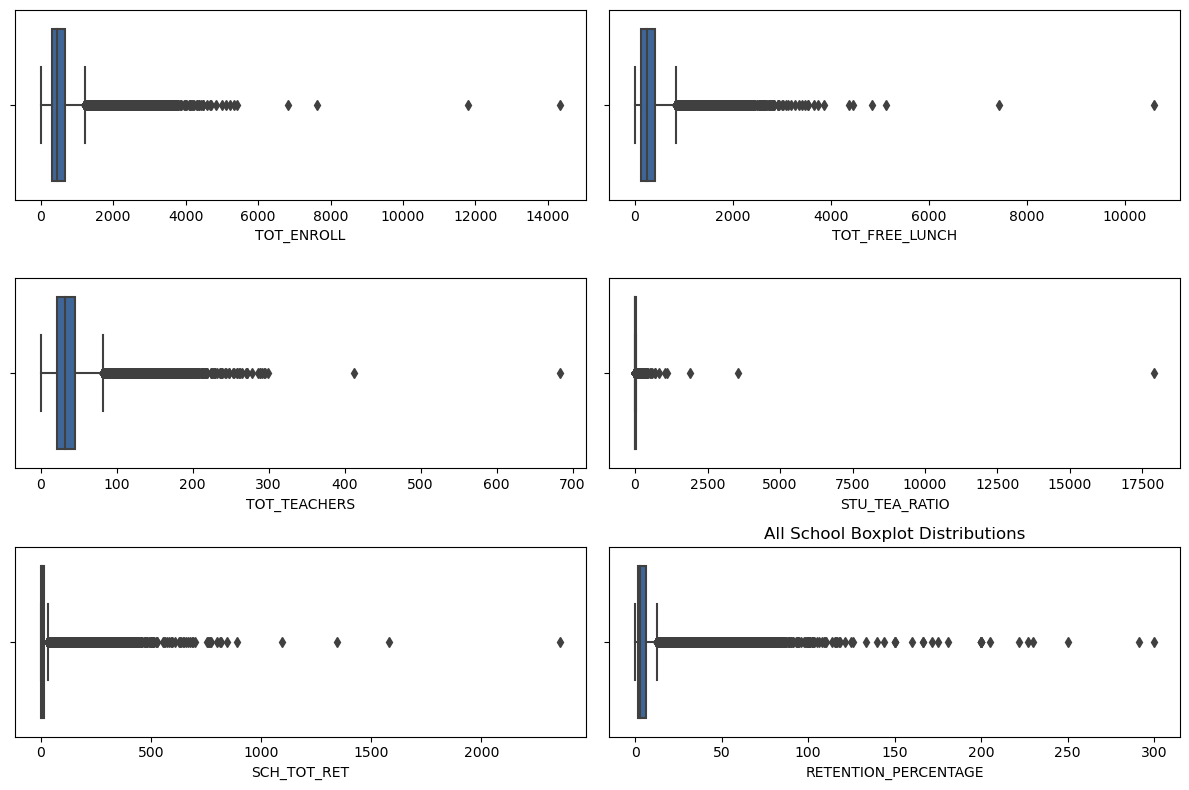

In [71]:
# view boxplots for variables of interest to observe distributions
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x=df['TOT_ENROLL'], ax=plt.subplot(3, 2, 1))
sns.boxplot(data=df, x=df['TOT_FREE_LUNCH'], ax=plt.subplot(3, 2, 2))

sns.boxplot(data=df, x=df['TOT_TEACHERS'], ax=plt.subplot(3, 2, 3))
sns.boxplot(data=df, x=df['STU_TEA_RATIO'], ax=plt.subplot(3, 2, 4))

sns.boxplot(data=df, x=df['SCH_TOT_RET'], ax=plt.subplot(3, 2, 5))
sns.boxplot(data=df, x=df['RETENTION_PERCENTAGE'], ax=plt.subplot(3, 2, 6))

plt.title('All School Boxplot Distributions')


plt.tight_layout()

### Box plots show many outliers for each variable

# Drop extreme outliers based on box plots 

In [72]:
# assign length of df before dropping outliers
len_df_cleaned = len(df_cleaned)
print('Length of df before dropping outerliers: ', len_df_cleaned)

# create a function to drop outliers based on boxplots
def drop_outliers_from_boxplots(df):
    '''In take a dataframe, and returns a dataframe with outliers dropped. Outliers to be dropped are
    determined via the boxplots. This function is also in the UDF notebook to be used universally across
    all notebooks.'''

    df = df[(df['TOT_ENROLL'] < 5000) & 
        (df['TOT_FREE_LUNCH'] < 4000) & 
        (df['TOT_TEACHERS'] < 300) & (df['TOT_TEACHERS'] >=1 ) &
        (df['STU_TEA_RATIO'] < 500) & 
        (df['SCH_TOT_RET'] < 750) &
        (df['RETENTION_PERCENTAGE'] < 100)]

    return df


df = drop_outliers_from_boxplots(df)

len_df = len(df)
print('Length of df after dropping outliers: ', len(df))

dropped_data = len_df_cleaned - len_df
print('Percentage of data rows dropped: ' + str((dropped_data / len_df_cleaned) * 100)  + '%')


Length of df before dropping outerliers:  47657
Length of df after dropping outliers:  40636
Percentage of data rows dropped: 14.73235831042659%


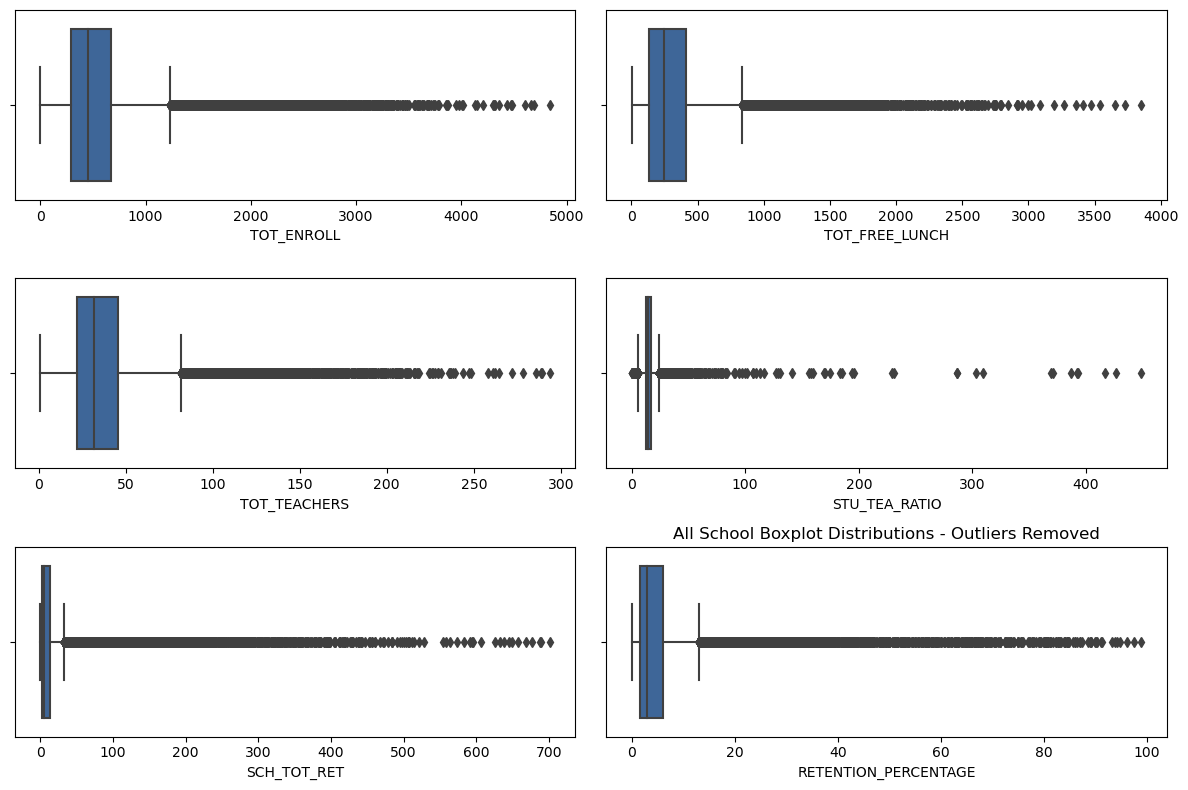

In [73]:
# view boxplots again, with outliers dropped
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x=df['TOT_ENROLL'], ax=plt.subplot(3, 2, 1))
sns.boxplot(data=df, x=df['TOT_FREE_LUNCH'], ax=plt.subplot(3, 2, 2))

sns.boxplot(data=df, x=df['TOT_TEACHERS'], ax=plt.subplot(3, 2, 3))
sns.boxplot(data=df, x=df['STU_TEA_RATIO'], ax=plt.subplot(3, 2, 4))

sns.boxplot(data=df, x=df['SCH_TOT_RET'], ax=plt.subplot(3, 2, 5))
sns.boxplot(data=df, x=df['RETENTION_PERCENTAGE'], ax=plt.subplot(3, 2, 6))

plt.title('All School Boxplot Distributions - Outliers Removed')
plt.tight_layout()

There are still many outliers but unfortunately due to the data being extremely skewed, removing more data by quartiles or z-scores would remove too much data within the tails. Let's take a look at the histogram distributions.

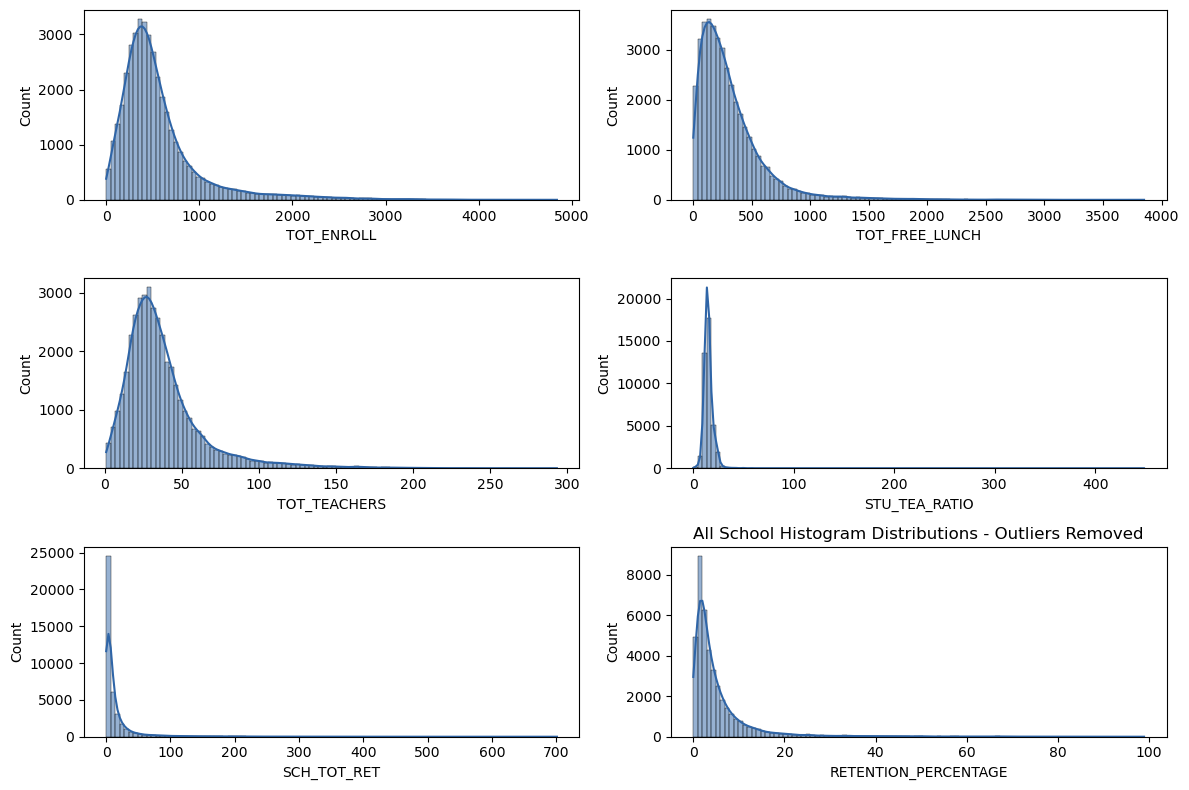

In [74]:
# create boxplot of each var
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='TOT_ENROLL', kde=True, bins=100, ax=plt.subplot(3, 2, 1))
sns.histplot(data=df, x='TOT_FREE_LUNCH', kde=True, bins=100, ax=plt.subplot(3, 2, 2))

sns.histplot(data=df, x='TOT_TEACHERS', kde=True, bins=100, ax=plt.subplot(3, 2, 3))
sns.histplot(data=df, x='STU_TEA_RATIO', kde=True, bins=100, ax=plt.subplot(3, 2, 4))

sns.histplot(data=df, x='SCH_TOT_RET', kde=True, bins=100, ax=plt.subplot(3, 2, 5))
sns.histplot(data=df, x='RETENTION_PERCENTAGE', kde=True, bins=100, ax=plt.subplot(3, 2, 6))

plt.title('All School Histogram Distributions - Outliers Removed')
plt.tight_layout()

### Histograms show each variable has a strong positive skew. 

Total enrollment and total teachers follow roughly the same shape distribution. The general range for enrollment appears to be about 0-1000 students, with a mean around 500. The range for teachers appears to be about 0-100, with a mean around 30.

Student teacher ratio is the closest to appearing like a normal distribution (although still with many outliers), indicating that the variability in the ratio is small across all schools. The mean student teacher ratio appears to be roughly 25, which aligns with the enrollment and teacher distributions.

Both school total retention and retention percentage are farther from a normal distribution than the other variables. The plots show that the mode for retention is 0, with the count of values decreasing as retention increases.

# Is retention correlated with any of our variables of interest?

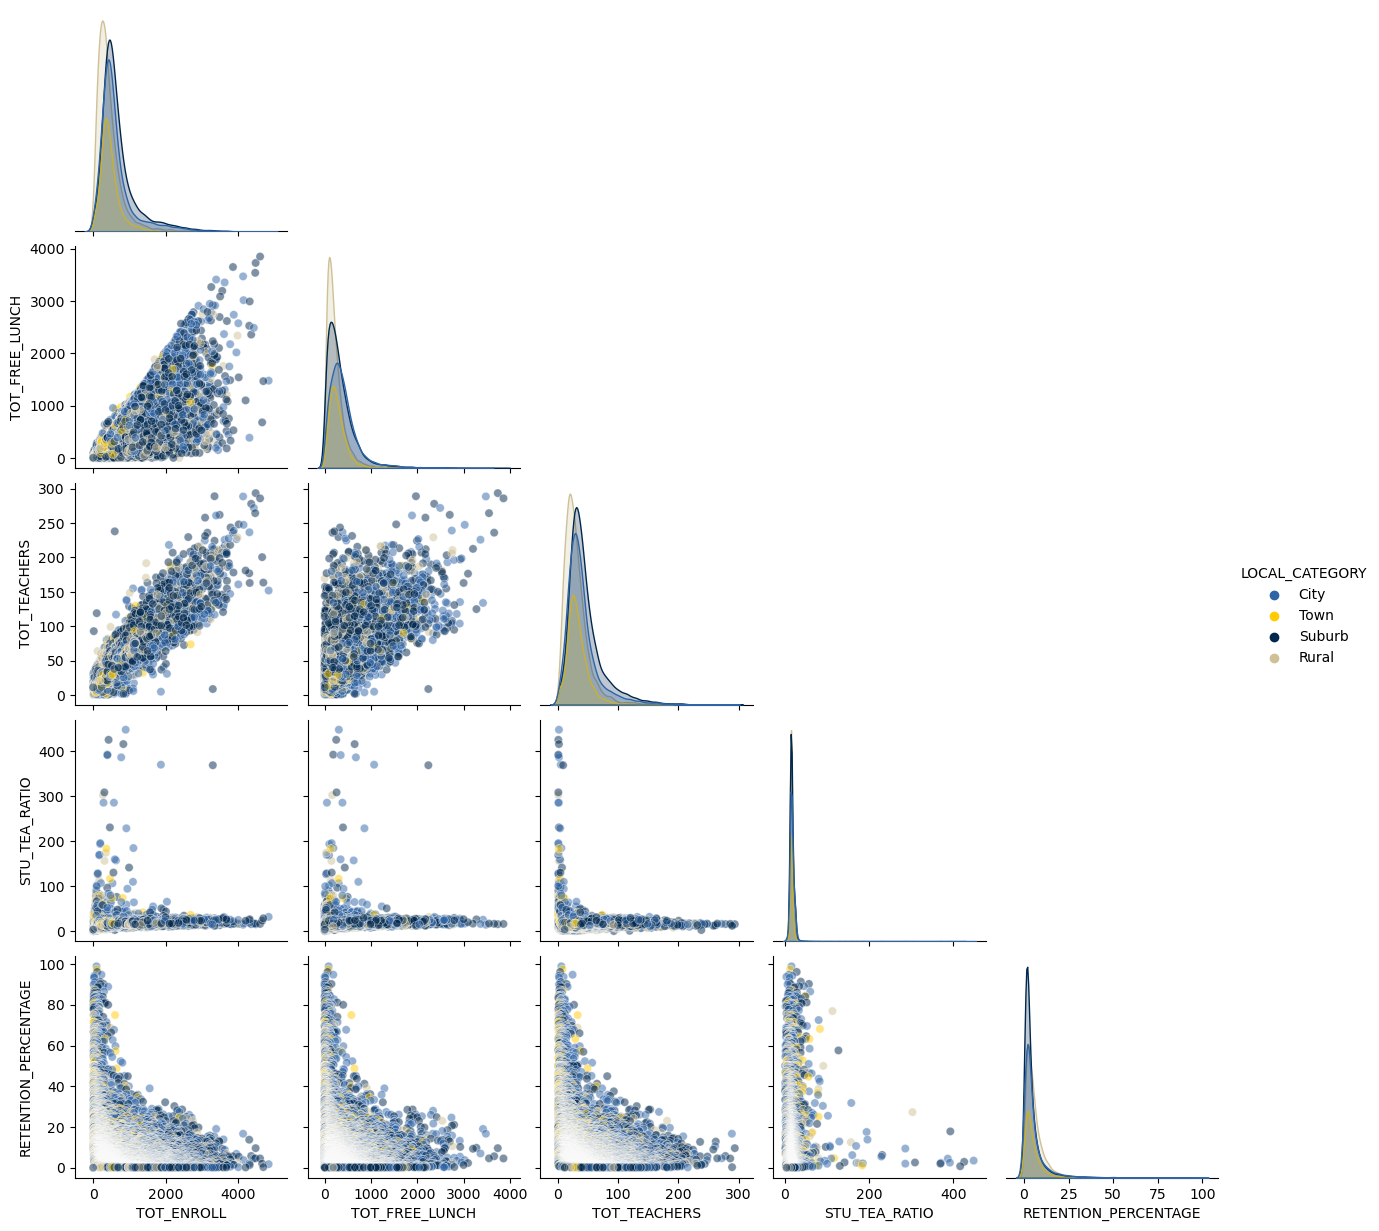

In [75]:
sns.pairplot(df, vars=['TOT_ENROLL', 'TOT_FREE_LUNCH', 'TOT_TEACHERS', 'STU_TEA_RATIO', 'RETENTION_PERCENTAGE'], hue='LOCAL_CATEGORY', corner=True, plot_kws={"alpha":0.5})
plt.show()

## Pair plot insights

Retention Percentage negative correlated with enrollment, free lunch, and total teachers. Student-teacher ratio does not appear to have any correlation with retention.

# Financial Assistance of Schools by Category

In [76]:
# create title i data frame
titlei_df = (df[(df['STITLEI']=='1-Yes') | (df['STITLEI']=='2-No')]).sort_values('RETENTION_PERCENTAGE', ascending=False)

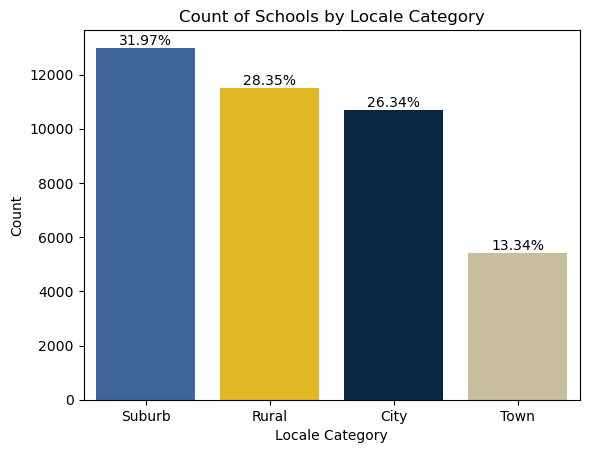

In [77]:
school_cats_counts = df.groupby('LOCAL_CATEGORY')['NCES_SCH_ID'].count().sort_values(ascending=False)

bars = sns.barplot(x=school_cats_counts.index, y=school_cats_counts.values)

# Adding text labels to bars
for bar in bars.patches:
    height = bar.get_height()
    percent = height / len(df) *100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.2f}%', ha='center', va='bottom')

plt.title('Count of Schools by Locale Category')
plt.xlabel('Locale Category')
plt.ylabel('Count')
plt.show()

### Towns are not well represented in the overall data, and suburbs are slightly overrepresented.

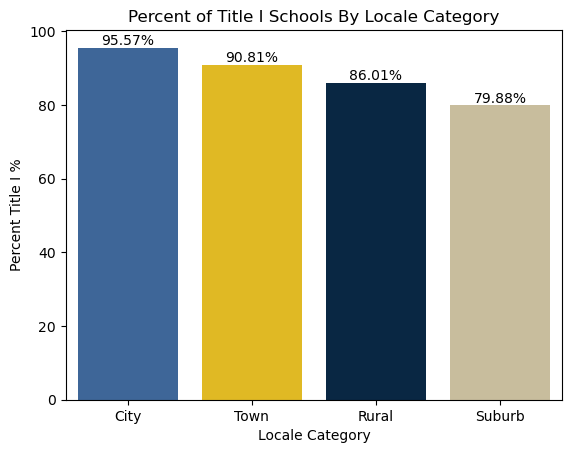

In [78]:
#titlei_df = combined_df[combined_df['STITLEI'].str.contains('2') | combined_df['STITLEI'].str.contains('1')]

h = ((titlei_df[titlei_df['STITLEI'] == '1-Yes']
            .groupby('LOCAL_CATEGORY')['STITLEI'].count().values) / titlei_df.groupby('LOCAL_CATEGORY')['TOT_ENROLL'].count() * 100).sort_values(ascending=False)

#bars = plt.bar(x=h.index, height=h.values)
bars = sns.barplot(x=h.index, y=h.values)

# Adding text labels to bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title("Percent of Title I Schools By Locale Category")
plt.xlabel('Locale Category')
plt.ylabel('Percent Title I %')
plt.show()

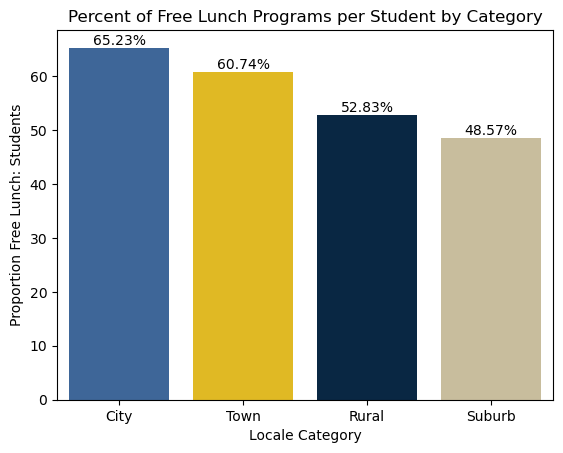

In [79]:
school_cats_lunch = df.groupby('LOCAL_CATEGORY')['TOT_FREE_LUNCH'].sum()
school_cats_members = df.groupby('LOCAL_CATEGORY')['TOT_ENROLL'].sum()
school_cats_prop_free_lunch = (school_cats_lunch / school_cats_members * 100).sort_values(ascending=False)


#bars = plt.bar(x=school_cats_prop_free_lunch.index, height=(school_cats_prop_free_lunch.values))
bars = sns.barplot(x=school_cats_prop_free_lunch.index, y=(school_cats_prop_free_lunch.values))

# Adding text labels to bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title("Percent of Free Lunch Programs per Student by Category")
plt.xlabel('Locale Category')
plt.ylabel('Proportion Free Lunch: Students')
plt.show()

### Based on both Title I status and proportion of free lunch programs to students shows that in both categories, city schools receive the most financial assistance, followed by town, rural, and then suburban schools.

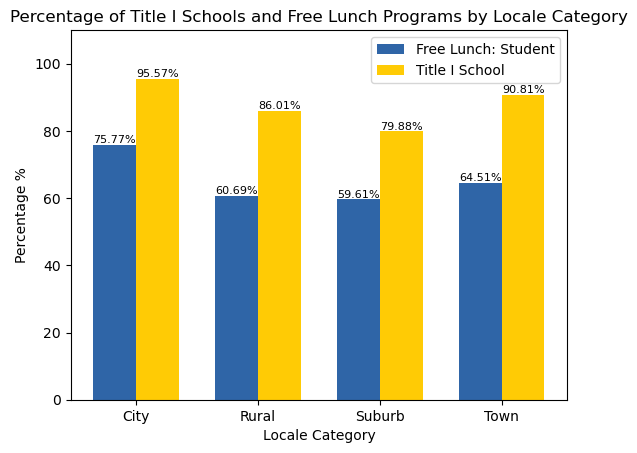

In [80]:
# create category index
school_categories = titlei_df.groupby('LOCAL_CATEGORY').sum()


# Calculate the props for each variable of interest
free_lunch = ((titlei_df.groupby('LOCAL_CATEGORY')['TOT_FREE_LUNCH'].sum().values) / titlei_df.groupby('LOCAL_CATEGORY')['TOT_ENROLL'].sum().values) * 100
title_i = ((titlei_df[titlei_df['STITLEI'] == '1-Yes']
            .groupby('LOCAL_CATEGORY')['STITLEI'].count().values) / titlei_df.groupby('LOCAL_CATEGORY')['TOT_ENROLL'].count().values) * 100


create_double_barchart(data=school_categories, 
                        var1=free_lunch, 
                        var2=title_i,
                        var1_label='Free Lunch: Student', 
                        var2_label='Title I School', 
                        xlabel='Locale Category', 
                        ylabel='Percentage %', 
                        ymax=110,
                        title='Percentage of Title I Schools and Free Lunch Programs by Locale Category',)
plt.show()

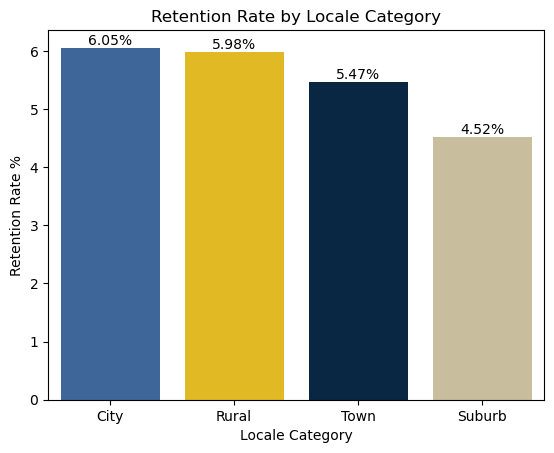

In [81]:
percent_ret_by_cat = df.groupby('LOCAL_CATEGORY')['RETENTION_PERCENTAGE'].mean().sort_values(ascending=False)

bars = sns.barplot(x=percent_ret_by_cat.index, y=percent_ret_by_cat.values)


# Adding text labels to bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title("Retention Rate by Locale Category")
plt.xlabel('Locale Category')
plt.ylabel('Retention Rate %')
plt.show()


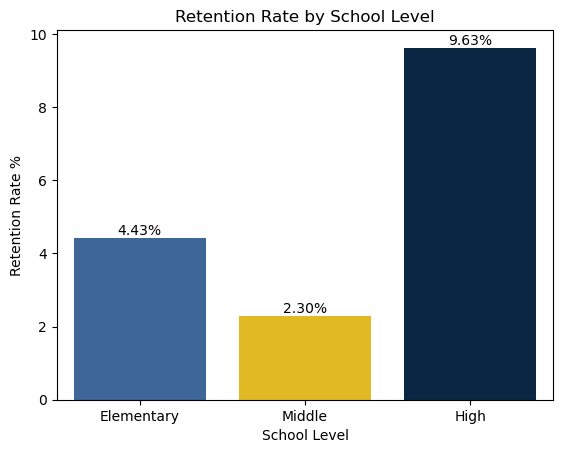

In [82]:
df['SCHOOL_LEVEL'] = pd.Categorical(df['SCHOOL_LEVEL'], categories=['Elementary', 'Middle', 'High'], ordered=True)

percent_ret_by_level = df.groupby('SCHOOL_LEVEL')['RETENTION_PERCENTAGE'].mean()


#bars = plt.bar(x=percent_ret_by_level.index, height=percent_ret_by_level.values)

bars = sns.barplot(x=percent_ret_by_level.index, y=percent_ret_by_level.values)


# Adding text labels to bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title("Retention Rate by School Level")
plt.xlabel('School Level')
plt.ylabel('Retention Rate %')
plt.show()

## Total school retention matches with the financial needs of the schools, indicating a positive correlation between financial assistance and retention.

### High school has the highest retention rate, followed by elementary school, and then middle school.

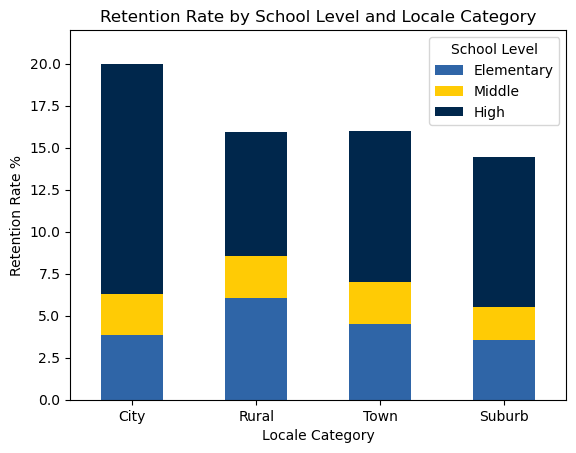

In [83]:
#sorted_df = df.sort_values('RETENTION_PERCENTAGE', ascending=False)
pivot_df = df.pivot_table(index='LOCAL_CATEGORY', columns='SCHOOL_LEVEL', values='RETENTION_PERCENTAGE', aggfunc='mean')
pivot_df_sorted = pivot_df[['Elementary', 'Middle', 'High']]
pivot_custom = pivot_df_sorted.reindex(['City', 'Rural', 'Town', 'Suburb'])


ax = pivot_custom.plot(kind='bar', stacked=True)
ax.set_title('Retention Rate by School Level and Locale Category')
ax.set_xlabel('Locale Category')
ax.set_ylabel('Retention Rate %')
ax.set_ylim([0,22])
ax.set_xticklabels(pivot_custom.index,rotation=0)
ax.legend(title='School Level')
plt.show()


# Virtual Retention - By Category and Grade Level

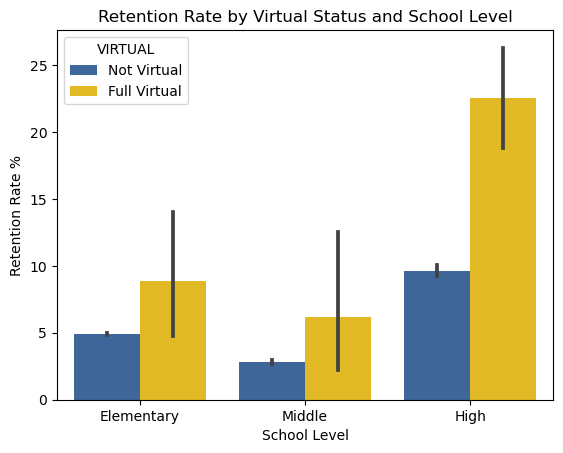

In [84]:
virtual_df = (df[(df['VIRTUAL']=='Full Virtual') | (df['VIRTUAL']=='Not Virtual')]).sort_values('RETENTION_PERCENTAGE', ascending=False)
virtual_df['SCHOOL_LEVEL'] = pd.Categorical(virtual_df['SCHOOL_LEVEL'], categories=['Elementary', 'Middle', 'High'], ordered=True)

# Plot the barplot
bars = sns.barplot(data=virtual_df, x='SCHOOL_LEVEL', y='RETENTION_PERCENTAGE', hue='VIRTUAL')
plt.xlabel('School Level')
plt.ylabel('Retention Rate %')
plt.title('Retention Rate by Virtual Status and School Level')
plt.show()

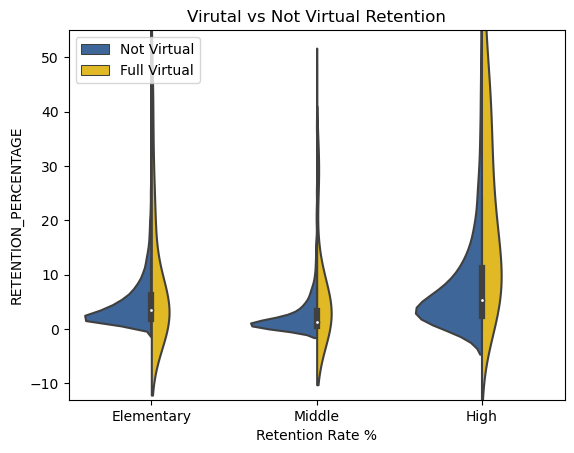

In [85]:
sns.violinplot(data=virtual_df, y='RETENTION_PERCENTAGE', x='SCHOOL_LEVEL', hue='VIRTUAL', split=True)
plt.ylim([-13,55])
#plt.xticks(rotation=45)
plt.xlabel('Retention Rate %')
plt.legend(loc='upper left')
plt.title('Retention Rate by Virtual Status and School Level')
plt.title('Virutal vs Not Virtual Retention')
plt.show()

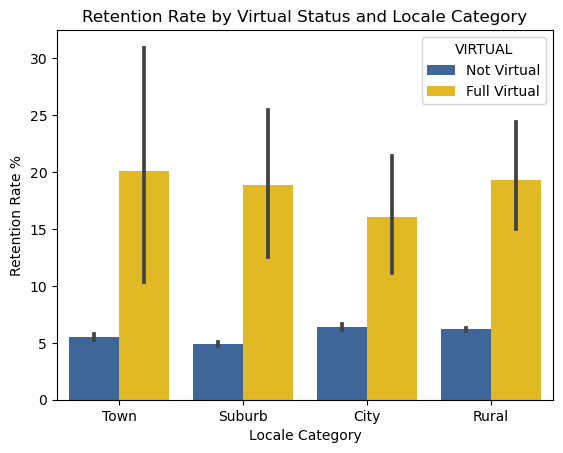

In [86]:
sns.barplot(virtual_df, x='LOCAL_CATEGORY', y='RETENTION_PERCENTAGE', hue='VIRTUAL')
plt.xlabel('Locale Category')
plt.ylabel('Retention Rate %')
plt.title('Retention Rate by Virtual Status and Locale Category')
plt.show()

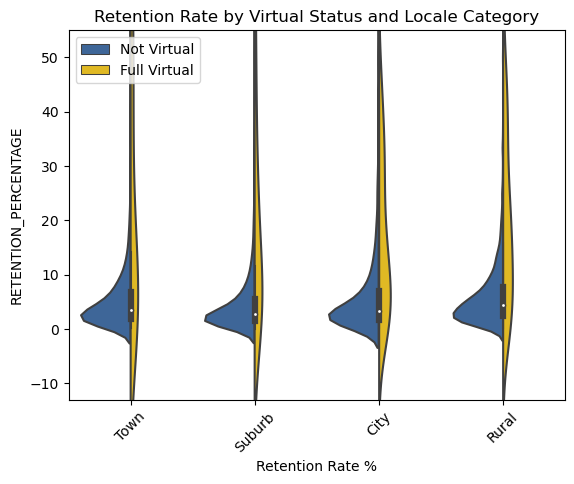

In [87]:
sns.violinplot(data=virtual_df, y='RETENTION_PERCENTAGE', x='LOCAL_CATEGORY', hue='VIRTUAL', split=True)
plt.ylim([-13,55])
plt.xticks(rotation=45)
plt.xlabel('Retention Rate %')
plt.legend(loc='upper left')
plt.title('Retention Rate by Virtual Status and Locale Category')
plt.show()

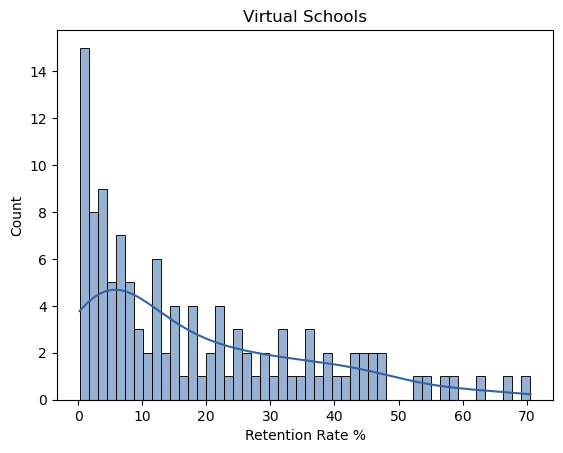

In [88]:
sns.histplot(data=virtual_df[virtual_df['VIRTUAL']=='Full Virtual'], x='RETENTION_PERCENTAGE', kde=True, bins=50)
plt.title('Virtual Schools')
plt.xlabel('Retention Rate %')
plt.show()

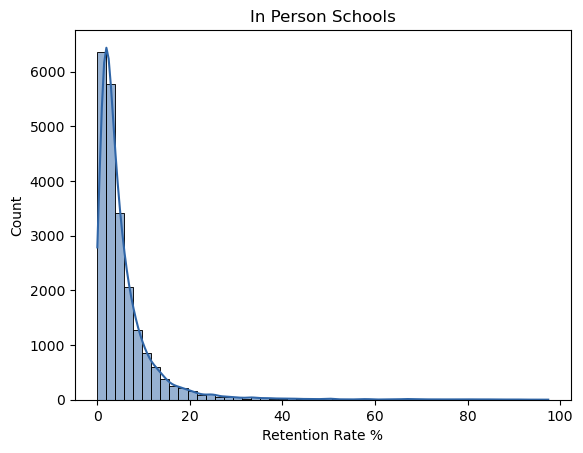

In [89]:
sns.histplot(data=virtual_df[virtual_df['VIRTUAL']=='Not Virtual'], x='RETENTION_PERCENTAGE', kde=True, bins=50)
plt.title('In Person Schools')
plt.xlabel('Retention Rate %')
plt.show()

### Virtual vs In Person Insights

Bar graphs show that full virtual has far worse retention rates than in person for every category and school level - most notably for high school. However, large error bars for virtual data suggests there is high variance for this distribution. 

The violin plots corroborate the high variance for virtual, showing a much larger spread for the virtual histograms, as compared to the in person histograms which are much tighter and normally distributed, with peaks centering around <5% retention in every category.

Printing the number of rows for virtual data vs in person data explains some of the difference (?? what word am I looking for?) between the two categories - virtual is highly underrepresented in the data as compared to in person. The data shows an interesting question to research further, but more data needs to be collected for virtual specifically to draw better conclusions.

In [90]:
print('Number of virtual schools in data: ' + str(len(df[(df['VIRTUAL']=='Full Virtual')])))
print('Number of in person schools in data: ' + str(len(df[(df['VIRTUAL']=='Not Virtual')])))

Number of virtual schools in data: 116
Number of in person schools in data: 22092


# Race Retention - All Schools

In [93]:
# create race retention columns
race_df = calculate_race_retention_rate(df)

In [94]:
# initialize list with race retention columns
race_ret_columns = [col for col in race_df.columns if 'ret_rate_' in col]
races=['Native Am', 'Asian', 'Black', "Hawaiian/PI", 'Hispanic', 'Multi-Race', 'White']

# rename the race retention columns in race_df to be just the races
for i in range(len(race_ret_columns)):
    race_df.rename(columns={race_ret_columns[i]: races[i]}, inplace=True)
    #races.append(col[-2:])

print(race_ret_columns)
print(races)

['ret_rate_AM', 'ret_rate_AS', 'ret_rate_BL', 'ret_rate_HP', 'ret_rate_HI', 'ret_rate_TR', 'ret_rate_WH']
['Native Am', 'Asian', 'Black', 'Hawaiian/PI', 'Hispanic', 'Multi-Race', 'White']


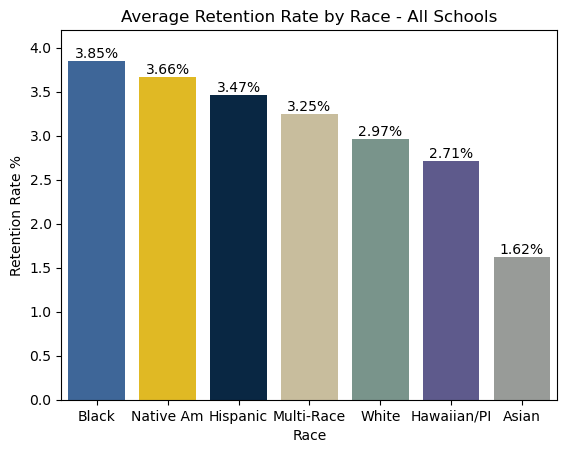

In [95]:

# take the mean of all retention rates, grouped by rates
race_averages = race_df[races].mean()

# sort retention averages in descending order
race_averages_sorted = race_averages.sort_values(ascending=False)

# create barplot of average retention rate by race
bars = sns.barplot(x=race_averages_sorted.index, y=race_averages_sorted.values)

# Adding text labels to bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Average Retention Rate by Race - All Schools')
plt.xlabel('Race')
#plt.xticks(rotation=15)
plt.ylabel('Retention Rate %')
plt.ylim([0, 4.2])
plt.show()

### Race appears to play a significant role in retention, with the spread between the race with the highest retention rate (Black) and the lowest retention rate (Asian) being 2.23%.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edfebf59-8cf0-4b7e-b1cf-d80b21ef0191' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>